문장 임베딩
  - 자연어처리에서 문장을 고정된 크기의 벡터로 변환하는 과정
  - 단어 임베딩과 달리 문장의 의미를 보존하는 것이 목표

Sentence Embedding 기법
  - 단순 평균 벡터(Averaging Word Vectors)
     - 개별 단어의 임베딩을 평균 내어 문장 벡터를 생성
     - 간단하고 계산 비용이 낮지만, 단어 순서와 구조를 반영하지 못함

     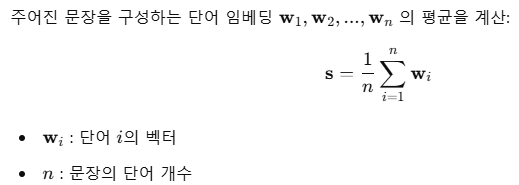

In [ ]:
texts = [
"Natural language processing is amazing",
"Sentence embeddings are useful for NLP tasks"
]